<a href="https://colab.research.google.com/github/Katharina-github/SalesDataAnalysis/blob/main/generate_synthetic_sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta, date

# Initialize Faker
fake = Faker()

# Define time range
date_start = datetime(2024, 1, 1)
date_end = datetime(2024, 12, 31)

# Generate only dates (without time)
date_range = pd.date_range(date_start, date_end, freq='D').date

# Define regions and their sales volume
regions_volume = {
    "Spain": "normal",
    "Italy": "normal",
    "Germany": "high",
    "Netherlands": "high",
    "UK": "low",
    "Ireland": "low"
}

# Define base sales ranges for each sales volume
base_sales_ranges = {
    "low": (10, 20),
    "normal": (20, 50),
    "high": (35, 80)
}

# Define categories and realistic product names
categories = {
    "Seeds": ["Tomato Seeds", "Basil Seeds", "Sunflower Seeds", "Carrot Seeds"],
    "Soil & Fertilizers": ["Organic Compost", "Potting Soil", "Nitrogen Fertilizer", "Mulch"],
    "Gardening Tools": ["Hand Trowel", "Pruning Shears", "Garden Hoe", "Rake"],
    "Outdoor Furniture": ["Garden Bench", "Patio Table", "Lounge Chair", "Swing Seat"],
    "Watering Systems": ["Drip Irrigation Kit", "Sprinkler System", "Watering Can", "Garden Hose"],
    "Pest Control": ["Slug Repellent", "Insect Netting", "Neem Oil Spray", "Ant Killer"],
    "Bulbs": ["Tulip Bulbs", "Daffodil Bulbs", "Lily Bulbs", "Hyacinth Bulbs"],
    "Compost": ["Peat-Free Compost", "Worm Castings", "Leaf Mold", "Manure Compost"],
    "Rakes": ["Leaf Rake", "Garden Rake", "Thatch Rake", "Lawn Rake"],
    "Indoor Plants": ["Snake Plant", "Spider Plant", "Peace Lily", "Aloe Vera"],
    "Pots & Planters": ["Terracotta Pot", "Hanging Basket", "Raised Garden Bed", "Self-Watering Pot"],
    "Decorative Gardening Items": ["Garden Gnome", "Solar Lanterns", "Trellis Arch", "Bird Bath"]
}

# Define realistic price ranges and profit margins per category
price_ranges = {
    "Seeds": (1, 5),  # High margin
    "Soil & Fertilizers": (5, 30),  # Low margin
    "Gardening Tools": (10, 50),  # Medium margin
    "Outdoor Furniture": (50, 500),  # Medium margin
    "Watering Systems": (10, 100),  # Medium margin
    "Pest Control": (5, 40),  # High margin
    "Bulbs": (2, 10),  # High margin
    "Compost": (5, 20),  # Low margin
    "Rakes": (15, 60),  # Medium margin
    "Indoor Plants": (10, 50),  # High margin
    "Pots & Planters": (5, 50),  # Medium margin
    "Decorative Gardening Items": (10, 100)  # High margin
}

# Define profit margins per category
profit_margins = {
    "Seeds": 0.4,  # 40% margin
    "Soil & Fertilizers": 0.2,  # 20% margin
    "Gardening Tools": 0.3,  # 30% margin
    "Outdoor Furniture": 0.25,  # 25% margin
    "Watering Systems": 0.3,  # 30% margin
    "Pest Control": 0.35,  # 35% margin
    "Bulbs": 0.4,  # 40% margin
    "Compost": 0.2,  # 20% margin
    "Rakes": 0.3,  # 30% margin
    "Indoor Plants": 0.4,  # 40% margin
    "Pots & Planters": 0.3,  # 30% margin
    "Decorative Gardening Items": 0.5  # 50% margin
}

# Generate Products Table
products = []
product_id = 1
for category, names in categories.items():
    for name in names:
        cost_price = round(random.uniform(price_ranges[category][0], price_ranges[category][1]), 2)
        selling_price = round(cost_price * (1 + profit_margins[category]), 2)  # Ensure selling price > cost price
        products.append([product_id, name, category, cost_price, selling_price, random.randint(1, 10)])  # Popularity
        product_id += 1
products_df = pd.DataFrame(products, columns=["ProductID", "ProductName", "Category", "CostPrice", "SellingPrice", "Popularity"])

# Function to generate buying frequency based on loyalty score
def get_buying_frequency(loyalty_score, segment):
    if segment == 'Retail':
        # Higher loyalty score increases the chance of higher buying frequency
        weights = [1 / (i + 1) for i in range(10)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 11), weights=weights, k=1)[0]
    else:
        # Wholesale customers have lower buying frequency
        weights = [1 / (i + 1) for i in range(5)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 6), weights=weights, k=1)[0]
    return buying_frequency

# Generate Customers Table
regions = ["Spain", "Italy", "Germany", "Netherlands", "UK", "Ireland"]
region_weights = [0.3, 0.25, 0.2, 0.15, 0.07, 0.03]  # Higher chance for Germany & Netherlands, lower for UK & Ireland
customers = pd.DataFrame({
    'CustomerID': range(1, 3001),
    'CustomerName': [fake.name() for _ in range(3000)],
    'Region': random.choices(regions, weights=region_weights, k=3000),
    'Segment': random.choices(['Retail', 'Wholesale'], weights=[0.9, 0.1], k=3000),
    'LoyaltyScore': [random.randint(1, 10) for _ in range(3000)],
    'Age': [random.randint(20, 70) for _ in range(3000)],
    'Gender': random.choices(['Male', 'Female'], k=3000),
    'JoinDate': [fake.date_between(start_date=date(2020, 1, 1), end_date=date(2023, 12, 31)) for _ in range(3000)],
    'Email': [fake.email() for _ in range(3000)],
    'PhoneNumber': [fake.phone_number() for _ in range(3000)],
    'BuyingFrequency': [get_buying_frequency(score, segment) for score, segment in zip(
        [random.randint(1, 10) for _ in range(3000)],  # LoyaltyScore
        random.choices(['Retail', 'Wholesale'], weights=[0.9, 0.1], k=3000)  # Segment
    )]
})

# Generate Campaigns
campaigns = []
for campaign_id in range(1, 6):
    campaign = {
        'CampaignID': campaign_id,
        'CampaignName': fake.catch_phrase(),
        'StartDate': fake.date_between(start_date=date(2022, 12, 2), end_date=date(2023, 12, 1)),
        'Region': random.choice(regions),
        'Budget': round(random.uniform(5000, 50000), 2)
    }
    campaign['EndDate'] = campaign['StartDate'] + timedelta(days=random.randint(30, 180))
    campaign['Impact'] = min(random.uniform(1.05, 1.1) + (campaign['Budget'] / 5000) * 0.1, 1.25)
    campaigns.append(campaign)
campaigns_df = pd.DataFrame(campaigns)

# Define region-specific seasonality factors
seasonality_countries = {
    "Spain": {1: 0.9, 2: 1.0, 3: 1.2, 4: 1.3, 5: 1.4, 6: 1.5, 7: 1.6, 8: 1.5, 9: 1.4, 10: 1.3, 11: 1.1, 12: 1.0},
    "Italy": {1: 0.9, 2: 1.0, 3: 1.2, 4: 1.3, 5: 1.4, 6: 1.5, 7: 1.6, 8: 1.5, 9: 1.4, 10: 1.3, 11: 1.1, 12: 1.0},
    "Germany": {1: 0.7, 2: 0.8, 3: 0.9, 4: 1.0, 5: 1.2, 6: 1.4, 7: 1.6, 8: 1.5, 9: 1.3, 10: 1.1, 11: 0.9, 12: 0.8},
    "Netherlands": {1: 0.7, 2: 0.8, 3: 0.9, 4: 1.0, 5: 1.2, 6: 1.4, 7: 1.6, 8: 1.5, 9: 1.3, 10: 1.1, 11: 0.9, 12: 0.8},
    "UK": {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.4, 8: 1.3, 9: 1.2, 10: 1.1, 11: 0.9, 12: 0.8},
    "Ireland": {1: 0.8, 2: 0.9, 3: 1.0, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.4, 8: 1.3, 9: 1.2, 10: 1.1, 11: 0.9, 12: 0.8}
}

seasonality_categories = {
    "Seeds": {1: 0.7, 2: 0.9, 3: 1.3, 4: 1.4, 5: 1.3, 6: 1.1, 7: 1.0, 8: 0.9, 9: 0.8, 10: 0.7, 11: 0.6, 12: 0.6},
    "Soil & Fertilizers": {1: 0.8, 2: 1.0, 3: 1.3, 4: 1.4, 5: 1.2, 6: 1.0, 7: 0.9, 8: 0.8, 9: 0.7, 10: 0.6, 11: 0.6, 12: 0.7},
    "Gardening Tools": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.4, 6: 1.5, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Outdoor Furniture": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.3, 6: 1.5, 7: 1.6, 8: 1.5, 9: 1.2, 10: 0.9, 11: 0.7, 12: 0.6},
    "Watering Systems": {1: 0.5, 2: 0.7, 3: 1.0, 4: 1.2, 5: 1.4, 6: 1.6, 7: 1.7, 8: 1.6, 9: 1.4, 10: 1.0, 11: 0.8, 12: 0.6},
    "Pest Control": {1: 0.4, 2: 0.6, 3: 1.0, 4: 1.3, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.2, 10: 1.0, 11: 0.7, 12: 0.5},
    "Bulbs": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.1, 6: 0.9, 7: 0.8, 8: 0.7, 9: 1.0, 10: 1.3, 11: 1.4, 12: 1.2},
    "Compost": {1: 0.7, 2: 0.8, 3: 1.0, 4: 1.2, 5: 1.3, 6: 1.1, 7: 1.0, 8: 0.9, 9: 1.3, 10: 1.4, 11: 1.3, 12: 1.0},
    "Rakes": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.1, 6: 1.2, 7: 1.1, 8: 1.0, 9: 1.3, 10: 1.5, 11: 1.4, 12: 1.2},
    "Indoor Plants": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.3},
    "Pots & Planters": {1: 0.6, 2: 0.8, 3: 1.1, 4: 1.3, 5: 1.5, 6: 1.4, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Decorative Gardening Items": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.3}
}

# Customer preference function
def get_customer_preference(age, category):
    if age >= 50 and category in ["Gardening Tools", "Outdoor Furniture", "Bulbs"]:
        return 1.5  # Older customers prefer traditional items
    elif age <= 35 and category in ["Indoor Plants", "Decorative Gardening Items"]:
        return 1.5  # Younger customers prefer trendy items
    else:
        return 1.0

# Function to select a product based on seasonality and customer preferences
def select_product(date, age, products_df, seasonality_categories):
    month = date.month
    category_weights = {}
    for category, factors in seasonality_categories.items():
        seasonality_weight = factors[month]
        preference_weight = get_customer_preference(age, category)
        category_weights[category] = seasonality_weight * preference_weight
    total_weight = sum(category_weights.values())
    category_weights = {k: v / total_weight for k, v in category_weights.items()}
    selected_category = random.choices(list(category_weights.keys()), weights=list(category_weights.values()), k=1)[0]
    category_products = products_df[products_df['Category'] == selected_category]
    # Reset index to avoid KeyError
    category_products = category_products.reset_index(drop=True)
    product_id = random.choices(category_products['ProductID'], weights=category_products['Popularity'], k=1)[0]
    return product_id

# Function to calculate discount
def get_discount(quantity, loyalty_score):
    base_discount = min(0.25, 0.05 * (quantity // 10) + 0.02 * loyalty_score)
    return round(base_discount, 2)


# Generate Inventory Table
inventory = []
for product_id in products_df['ProductID']:
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    popularity = products_df.loc[products_df['ProductID'] == product_id, 'Popularity'].values[0]
    stock_level = random.randint(10, 500) * (popularity / 10)  # Higher stock for popular items
    reorder_point = random.randint(5, 50)
    inventory.append([product_id, stock_level, reorder_point])
inventory_df = pd.DataFrame(inventory, columns=["ProductID", "StockLevel", "ReorderPoint"])

# Generate sales data
sales = []
not_realized_purchases = []
sale_id = 0

for date in date_range:
    for region, volume in regions_volume.items():
        base_sales = random.randint(base_sales_ranges[volume][0], base_sales_ranges[volume][1])
        seasonality = seasonality_countries[region][date.month]
        campaign_factor = 1.0
        for campaign in campaigns:
            start_date = campaign['StartDate']
            end_date = campaign['EndDate']
            if campaign['Region'] == region and start_date <= date <= end_date:
                campaign_factor *= campaign['Impact']
        adjusted_sales = int(base_sales * seasonality * campaign_factor)
        if date.weekday() >= 5:  # Weekend multiplier
            adjusted_sales = int(adjusted_sales * 1.3)
        adjusted_sales += random.randint(-5, 10)

        for _ in range(adjusted_sales):
            region_customers = customers[customers['Region'] == region]
            customer = region_customers.sample(1, weights=region_customers['BuyingFrequency'] / region_customers['BuyingFrequency'].sum()).iloc[0]
            customer_id = customer['CustomerID']
            segment = customer['Segment']
            age = customer['Age']

            product_id = select_product(date, age, products_df, seasonality_categories)
            category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
            quantity = random.randint(10, 100) if segment == 'Wholesale' else random.randint(1, 3)
            loyalty_score = customer['LoyaltyScore']
            discount_rate = get_discount(quantity, loyalty_score)
            selling_price = products_df.loc[products_df['ProductID'] == product_id, 'SellingPrice'].values[0]
            discount_amount = round(quantity * selling_price * discount_rate, 2)
            sales_amount = round((quantity * selling_price) - discount_amount, 2)
            payment_method = random.choice(['Credit Card', 'PayPal', 'Bank Transfer'])
            shipping_cost = round(random.uniform(5, 50), 2)

            stock_level = inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'].values[0]
            if stock_level >= quantity:
                inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'] -= quantity
                sales.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])
                customers.loc[customers['CustomerID'] == customer_id, 'LoyaltyScore'] += 1
                sale_id += 1
            else:
                not_realized_purchases.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])

    # Restock inventory at the end of the day
    for index, row in inventory_df.iterrows():
        if row['StockLevel'] <= row['ReorderPoint']:
            inventory_df.at[index, 'StockLevel'] += random.randint(50, 200)

# Create DataFrames
sales_df = pd.DataFrame(sales, columns=["SaleID", "Date", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])
not_realized_purchases_df = pd.DataFrame(not_realized_purchases, columns=["SaleID", "Date", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])

# Generate Returns Table
def get_return_rate(category):
    if category in ["Indoor Plants", "Bulbs"]:
        return 0.2  # 20% return rate for fragile items
    elif category in ["Outdoor Furniture"]:
        return 0.05  # 5% return rate for heavy items
    else:
        return 0.1  # 10% return rate for other items

returns = []
for return_id in range(1, 101):
    sale_id = random.choice(sales_df['SaleID'].tolist())
    product_id = sales_df.loc[sales_df['SaleID'] == sale_id, 'ProductID'].values[0]
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    if random.random() < get_return_rate(category):
        return_date = fake.date_between(start_date=date(2023, 1, 1), end_date=date(2023, 12, 31))
        reason = random.choices(['Defective', 'Wrong Item', 'Customer Changed Mind', 'Late Delivery'], k=1)[0]
        returns.append([return_id, sale_id, return_date, reason])
returns_df = pd.DataFrame(returns, columns=["ReturnID", "SaleID", "ReturnDate", "Reason"])

# Save to CSV
products_df.to_csv('products.csv', index=False)
customers.to_csv('customers.csv', index=False)
sales_df.to_csv('sales.csv', index=False)
returns_df.to_csv('returns.csv', index=False)
campaigns_df.to_csv('campaigns.csv', index=False)
inventory_df.to_csv('inventory.csv', index=False)
not_realized_purchases_df.to_csv('not_realized_purchases.csv', index=False)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
3           3  
Compost
    ProductID        ProductName Category  CostPrice  SellingPrice  Popularity
28         29  Peat-Free Compost  Compost      16.89         20.27           9
29         30      Worm Castings  Compost      17.46         20.95           2
30         31          Leaf Mold  Compost      19.22         23.06           8
31         32     Manure Compost  Compost       6.64          7.97           7
   ProductID        ProductName Category  CostPrice  SellingPrice  Popularity
0         29  Peat-Free Compost  Compost      16.89         20.27           9
1         30      Worm Castings  Compost      17.46         20.95           2
2         31          Leaf Mold  Compost      19.22         23.06           8
3         32     Manure Compost  Compost       6.64          7.97           7
Bulbs
    ProductID     ProductName Category  CostPrice  SellingPrice  Popularity
24         25     Tulip Bulbs    Bulbs    

# **Data check**

In [ ]:
import pandas as pd
import numpy as np

def check_data_quality(products_df, customers_df, sales_df, returns_df, campaigns_df):
    results = {}

    # Check for duplicates
    results['duplicates'] = {
        'products': products_df.duplicated().sum(),
        'customers': customers_df.duplicated().sum(),
        'sales': sales_df.duplicated().sum(),
        'returns': returns_df.duplicated().sum(),
        'campaigns': campaigns_df.duplicated().sum()
    }

    # Check for missing values
    results['missing_values'] = {
        'products': products_df.isnull().sum().to_dict(),
        'customers': customers_df.isnull().sum().to_dict(),
        'sales': sales_df.isnull().sum().to_dict(),
        'returns': returns_df.isnull().sum().to_dict(),
        'campaigns': campaigns_df.isnull().sum().to_dict()
    }

    # Check for invalid sales (Negative values)
    results['invalid_sales'] = sales_df[(sales_df['SalesAmount'] < 0) | (sales_df['Price'] < 0)].shape[0]

    # Check if ProductID exists in products_df
    results['invalid_product_ids'] = sales_df[~sales_df['ProductID'].isin(products_df['ProductID'])].shape[0]

    # Check if CustomerID exists in customers_df
    results['invalid_customer_ids'] = sales_df[~sales_df['CustomerID'].isin(customers_df['CustomerID'])].shape[0]

    # Ensure discounts are within logical range (0 - 0.25 as per business rules)
    results['invalid_discounts'] = sales_df[(sales_df['DiscountRate'] < 0) | (sales_df['DiscountRate'] > 0.25)].shape[0]

    # Check for unrealistic quantities
    results['unrealistic_quantities'] = sales_df[sales_df['Quantity'] <= 0].shape[0]

    # Ensure Return SaleIDs exist in sales
    results['invalid_return_sale_ids'] = returns_df[~returns_df['SaleID'].isin(sales_df['SaleID'])].shape[0]

    # Ensure campaign end date is after start date
    results['invalid_campaign_dates'] = campaigns_df[campaigns_df['EndDate'] < campaigns_df['StartDate']].shape[0]

    return results

# Example usage:
data_quality_results = check_data_quality(products_df, customers, sales_df, returns_df, campaigns_df)
print(data_quality_results)

<Axes: title={'center': 'Sales Distribution by Month'}, xlabel='Date'>

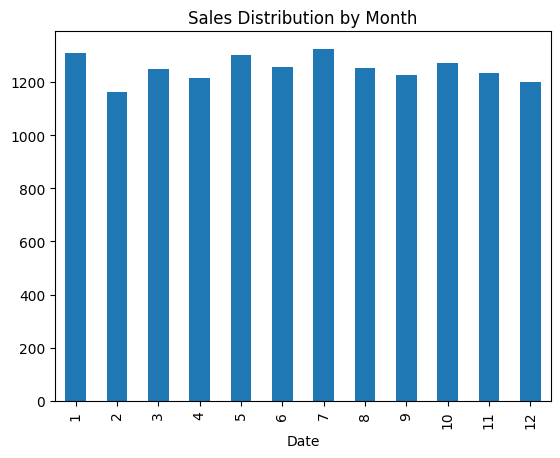

In [ ]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_by_month = sales_df.groupby(sales_df["Date"].dt.month)["SalesAmount"].count()
sales_by_month.plot(kind="bar", title="Sales Distribution by Month")

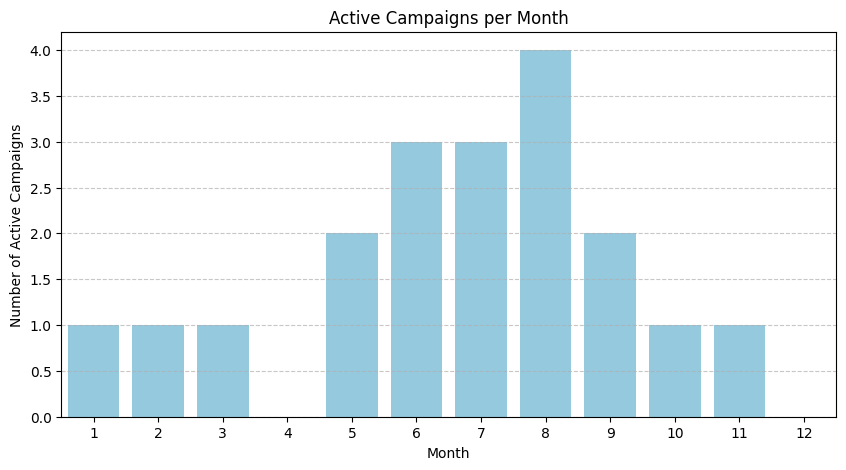

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure StartDate and EndDate are in datetime format
campaigns_df['StartDate'] = pd.to_datetime(campaigns_df['StartDate'])
campaigns_df['EndDate'] = pd.to_datetime(campaigns_df['EndDate'])

# Generate a DataFrame to count active campaigns per month
months = np.arange(1, 13)  # Months from 1 to 12
active_campaigns = {month: 0 for month in months}

# Count campaigns active in each month
for _, row in campaigns_df.iterrows():
    start_month = row['StartDate'].month
    end_month = row['EndDate'].month
    for month in range(start_month, end_month + 1):
        active_campaigns[month] += 1

# Convert dictionary to DataFrame
active_campaigns_df = pd.DataFrame(list(active_campaigns.items()), columns=['Month', 'ActiveCampaigns'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=active_campaigns_df, x='Month', y='ActiveCampaigns', color='skyblue')

# Customize
plt.xticks(np.arange(12), labels=[f'{m}' for m in range(1, 13)])
plt.xlabel("Month")
plt.ylabel("Number of Active Campaigns")
plt.title("Active Campaigns per Month")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

In [ ]:
campaigns_df.head(10)

,CampaignID,CampaignName,StartDate,Region,Budget,EndDate
0,1,Innovative exuding migration,2023-05-19,Spain,47878.72,2023-08-11
1,2,Face-to-face context-sensitive info-mediaries,2023-01-15,Germany,14505.90,2023-03-22
2,3,Enhanced web-enabled capability,2023-06-16,Germany,41797.43,2023-09-14
3,4,Ergonomic scalable throughput,2023-08-10,Germany,36613.58,2023-11-28
4,5,Synergistic composite portal,2023-05-09,Spain,35251.52,2023-08-12


Text(0.5, 1.0, 'Loyalty Score Distribution')

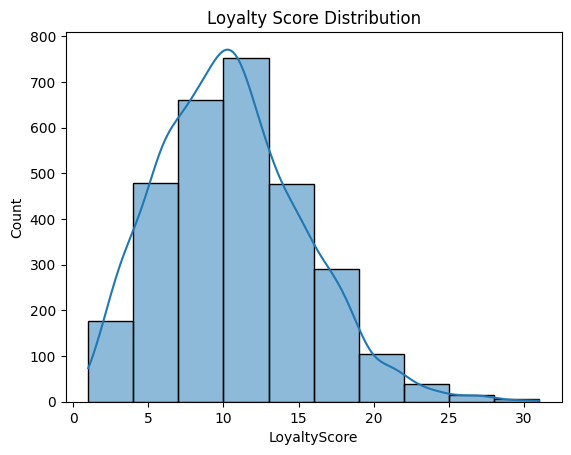

In [ ]:
import seaborn as sns
sns.histplot(customers["LoyaltyScore"], bins=10, kde=True).set_title("Loyalty Score Distribution")

In [ ]:
# Merge sales_df with customers_df on CustomerID
sales_df = sales_df.merge(customers[['CustomerID', 'LoyaltyScore']], on='CustomerID', how='left')

high_discounts = sales_df[sales_df["DiscountRate"] > 0.2]
print(high_discounts.head(10))

    SaleID       Date  ProductID  CustomerID       Region  SalesAmount  \
1        2 2023-11-12         16        1919  Netherlands      4049.30   
2        3 2023-09-06         26        2505      Germany       541.80   
3        4 2023-10-21         46        2627      Ireland      5128.80   
5        6 2023-03-14         25        1997      Germany       469.00   
7        8 2023-02-21         11        1356      Germany       111.12   
9       10 2023-12-17         11        1485        Italy       305.58   
10      11 2023-07-17         12        2362      Ireland      2697.82   
13      14 2023-07-22         14        2305  Netherlands     12882.72   
20      21 2023-07-21         13        1349      Germany      2481.72   
22      23 2023-02-04         34        1082        Spain      1248.48   

     Price  DiscountRate  DiscountAmount  Quantity  PaymentMethod  \
1   404.93          0.25         1012.32        10    Credit Card   
2    12.60          0.25          135.45       

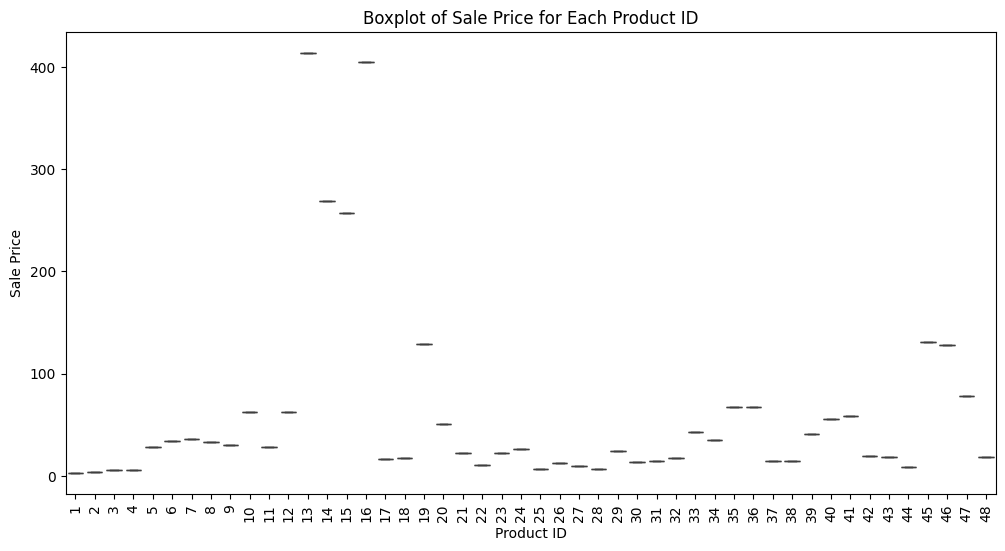

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='Price')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sale Price")
plt.title("Boxplot of Sale Price for Each Product ID")

# Show plot
plt.show()

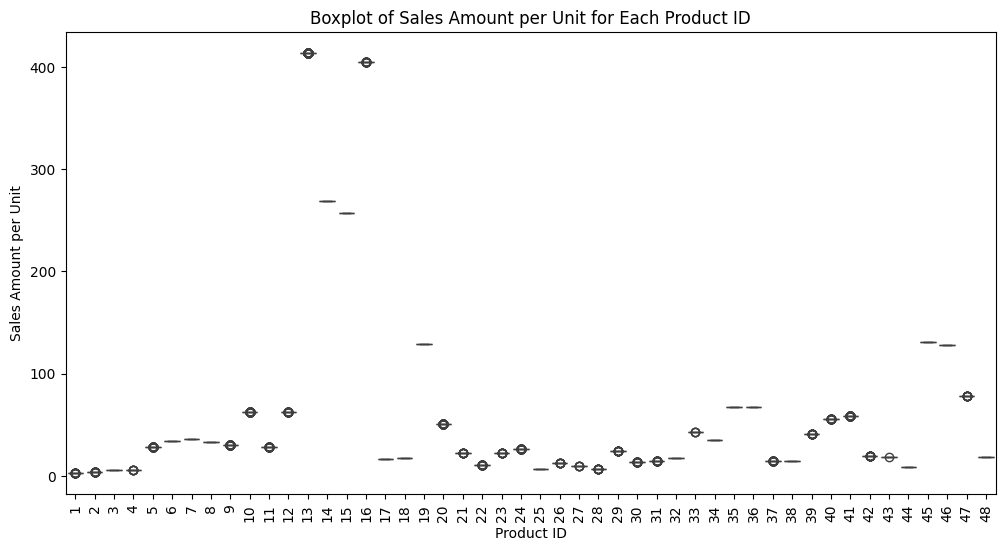

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate SalesAmount per unit
sales_df['SalesAmount_per_Unit'] = sales_df['SalesAmount'] / sales_df['Quantity']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='SalesAmount_per_Unit')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sales Amount per Unit")
plt.title("Boxplot of Sales Amount per Unit for Each Product ID")

# Show plot
plt.show()

In [ ]:
products_df.head(20)

,ProductID,ProductName,Category,CostPrice,SellingPrice,Popularity
0,1,Tomato Seeds,Seeds,1.97,2.76,7
1,2,Basil Seeds,Seeds,2.82,3.95,2
2,3,Sunflower Seeds,Seeds,4.01,5.61,5
3,4,Carrot Seeds,Seeds,3.76,5.26,5
4,5,Organic Compost,Soil & Fertilizers,23.62,28.34,7
5,6,Potting Soil,Soil & Fertilizers,28.05,33.66,5
6,7,Nitrogen Fertilizer,Soil & Fertilizers,29.75,35.70,8
7,8,Mulch,Soil & Fertilizers,27.61,33.13,8
8,9,Hand Trowel,Gardening Tools,23.41,30.43,7
9,10,Pruning Shears,Gardening Tools,47.91,62.28,6


<ipython-input-15-9b98996a82f2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")


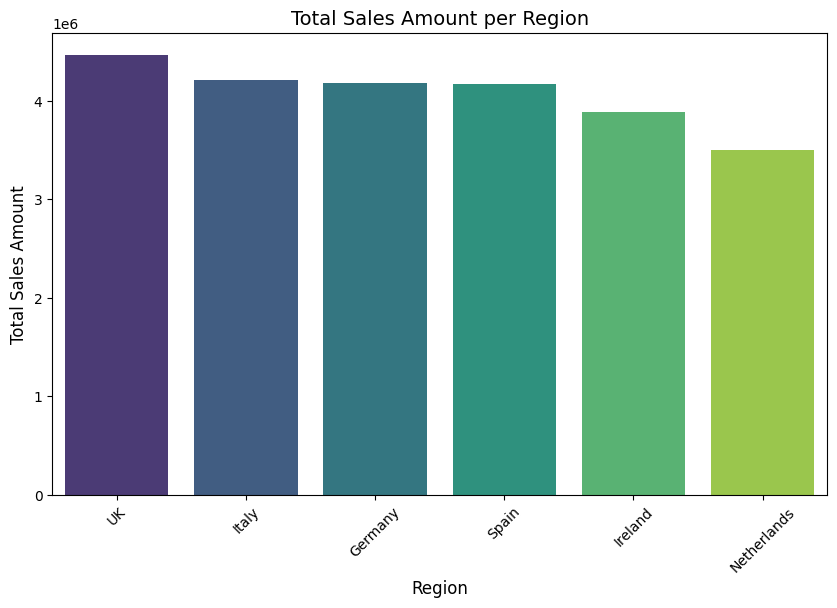

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group sales by region
sales_per_region = sales_df.groupby('Region', as_index=False)['SalesAmount'].sum()

# Sort values for better visualization
sales_per_region = sales_per_region.sort_values(by="SalesAmount", ascending=False)

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")

# Add labels and title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.title("Total Sales Amount per Region", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

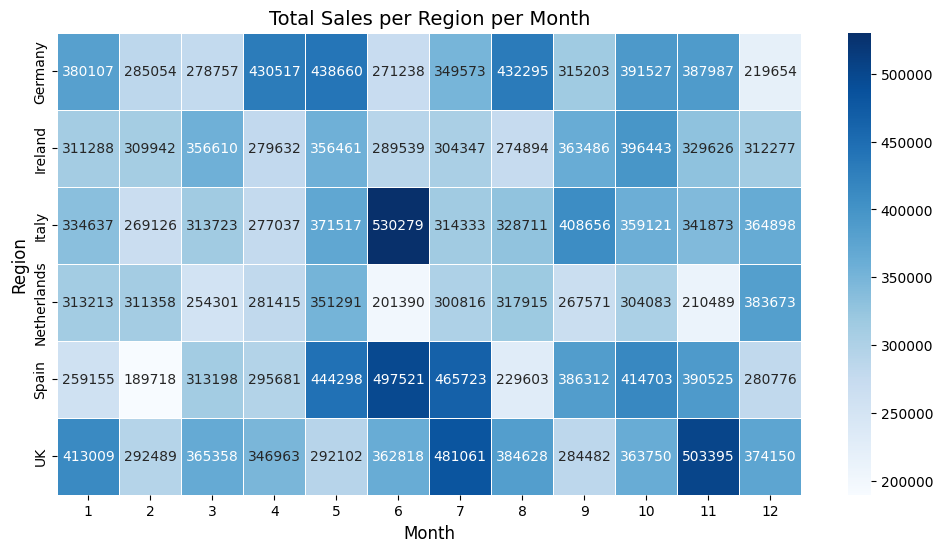

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Date' is in datetime format
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

# Extract year-month for grouping
sales_df["Month"] = sales_df["Date"].dt.month

# Pivot table for heatmap
sales_pivot = sales_df.pivot_table(values="SalesAmount", index="Region", columns="Month", aggfunc="sum")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Titles and labels
plt.title("Total Sales per Region per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Show plot
plt.show()

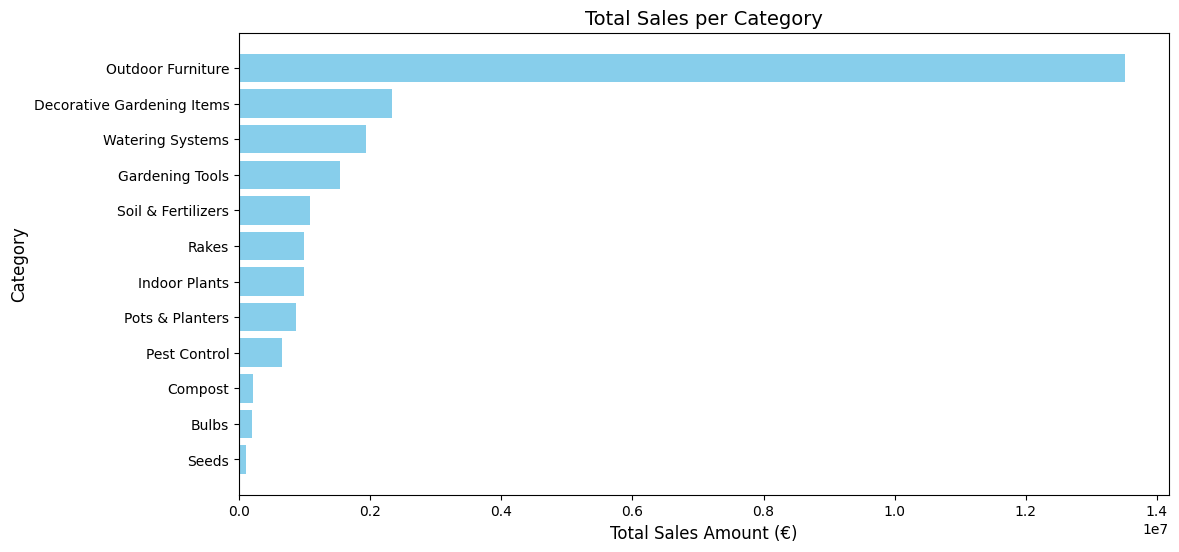

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and sum sales amount
category_sales = sales_with_category.groupby("Category_y")["SalesAmount"].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by="SalesAmount", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_sales["Category_y"], category_sales["SalesAmount"], color="skyblue")

# Labels and title
plt.xlabel("Total Sales Amount (€)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Total Sales per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

In [ ]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")
sales_with_category.head()

,SaleID,Date,ProductID,CustomerID,Region,SalesAmount,Price,DiscountRate,DiscountAmount,Quantity,PaymentMethod,ShippingCost,SalesAmount_per_Unit,LoyaltyScore,Month,Category_x,Category_y
0,1,2023-06-29,8,145,UK,66.26,33.13,0.16,10.600,2,Bank Transfer,35.80,33.13,10,6,NaN,Soil & Fertilizers
1,2,2023-11-12,16,1919,Netherlands,4049.30,404.93,0.25,1012.320,10,Credit Card,26.12,404.93,13,11,NaN,Outdoor Furniture
2,3,2023-09-06,26,2505,Germany,541.80,12.60,0.25,135.450,43,Credit Card,15.45,12.60,13,9,NaN,Bulbs
3,4,2023-10-21,46,2627,Ireland,5128.80,128.22,0.24,1230.910,40,Credit Card,29.72,128.22,11,10,NaN,Decorative Gardening Items
4,5,2023-11-15,47,289,Germany,311.64,77.91,0.20,62.328,4,Credit Card,24.25,77.91,10,11,NaN,Decorative Gardening Items
